In [4]:
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

from services.service import get_image, visualize_bbox, convertFromJson, convertToXYmax
ROOT = Path('__file__').resolve().parents[2]


In [5]:
list_train = glob.glob(os.path.join(ROOT, 'data/content/*/*.csv'))
list_train


['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022/23.06.2022 tr_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022/27062022_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 from 00010F_4 .csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 to 00010F_4.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3/khakimov- sign project 3_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022/19_07_22_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022/15.08.2022 full_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/05.07-22.08/05.07.2022 (full)_csv.

In [6]:
data = pd.read_csv(list_train[0])
data

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,NO20220623-160950-000054F_1.JPG,610139,{},4,0,"{""name"":""rect"",""x"":1764,""y"":320,""width"":153,""h...","{""Name"":""5.33"",""Type"":""Informational_sign""}"
1,NO20220623-160950-000054F_1.JPG,610139,{},4,1,"{""name"":""rect"",""x"":1750,""y"":384,""width"":187,""h...","{""Name"":""2.1"",""Type"":""Priority_sign""}"
2,NO20220623-160950-000054F_1.JPG,610139,{},4,2,"{""name"":""rect"",""x"":1098,""y"":549,""width"":53,""he...","{""Name"":""2.1"",""Type"":""Priority_sign""}"
3,NO20220623-160950-000054F_1.JPG,610139,{},4,3,"{""name"":""rect"",""x"":1570,""y"":616,""width"":65,""he...","{""Name"":""5.16.2"",""Type"":""Informational_sign""}"
4,NO20220623-160950-000054F_2.JPG,450237,{},2,0,"{""name"":""rect"",""x"":1047,""y"":478,""width"":58,""he...","{""Name"":""2.1""}"
...,...,...,...,...,...,...,...
657,NO20220623-200545-000100F_2.JPG,354621,{},3,1,"{""name"":""rect"",""x"":2071,""y"":477,""width"":104,""h...","{""Name"":""3.4"",""Type"":""Forbidding_sign""}"
658,NO20220623-200545-000100F_2.JPG,354621,{},3,2,"{""name"":""rect"",""x"":2081,""y"":591,""width"":104,""h...","{""Name"":""7.3.3"",""Type"":""Additional_info_sign""}"
659,NO20220623-200845-000101F_1.JPG,338293,{},2,0,"{""name"":""rect"",""x"":1720,""y"":406,""width"":133,""h...","{""Name"":""5.16.2"",""Type"":""Informational_sign""}"
660,NO20220623-200845-000101F_1.JPG,338293,{},2,1,"{""name"":""rect"",""x"":1498,""y"":624,""width"":84,""he...","{""Name"":""5.46"",""Type"":""Informational_sign""}"


In [7]:
data.iloc[76]

filename                                     NO20220623-161851-000057F_1.JPG
file_size                                                             565738
file_attributes                                                           {}
region_count                                                               6
region_id                                                                  2
region_shape_attributes    {"name":"rect","x":1815,"y":620,"width":56,"he...
region_attributes                   {"Name":"3.27","Type":"Forbidding_sign"}
Name: 76, dtype: object

In [8]:
data = convertFromJson(data)
data = convertToXYmax(data)

Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


<AxesSubplot: >

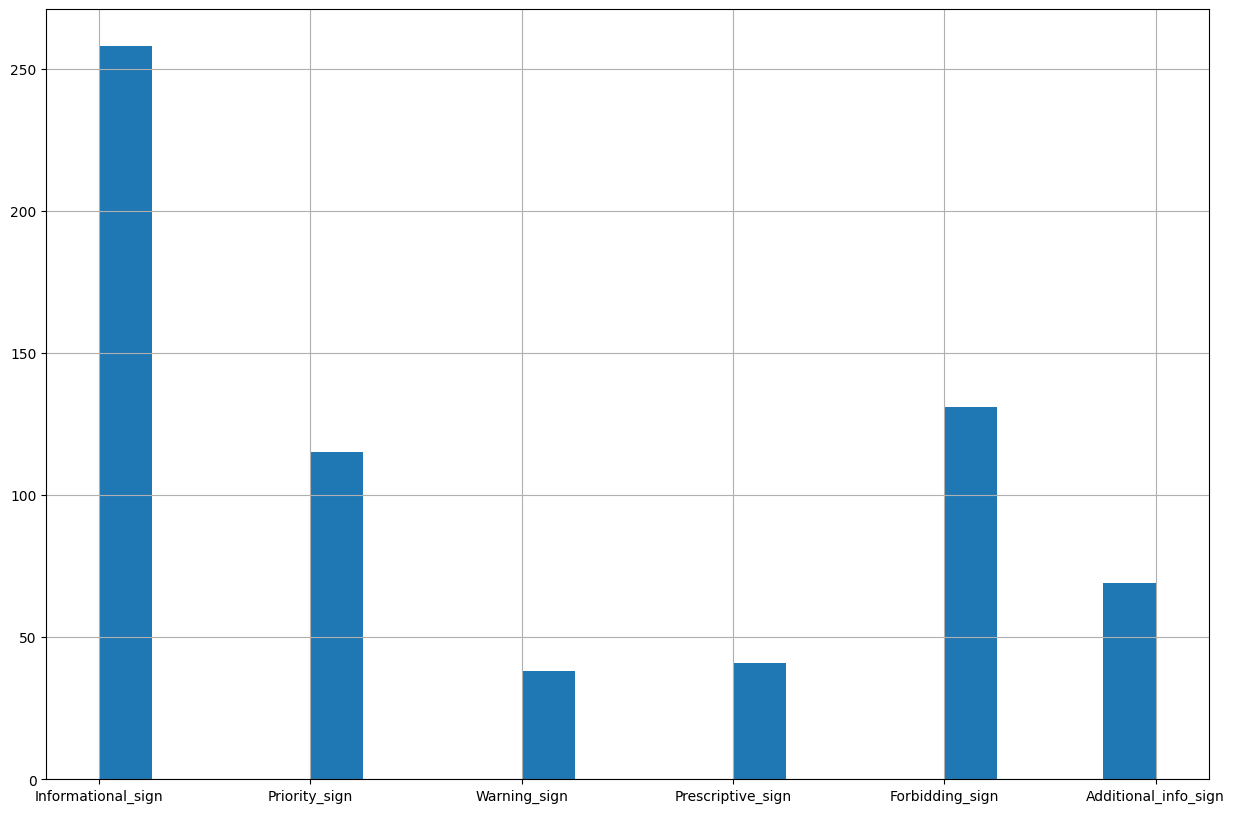

In [9]:
data['class'].hist(figsize=(15, 10), bins=20)

<AxesSubplot: >

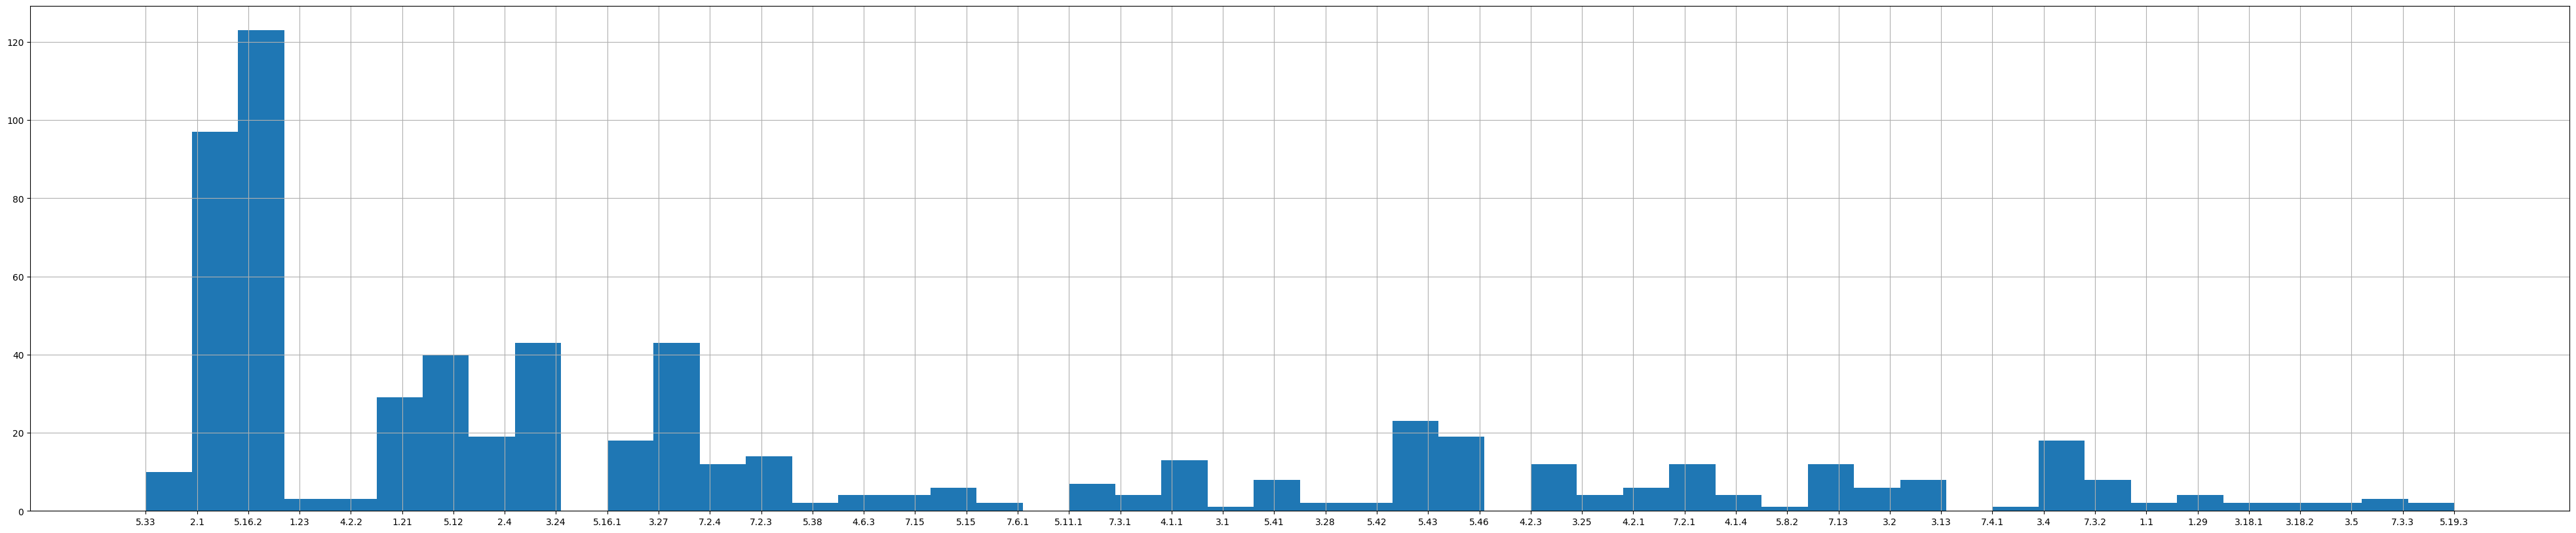

In [10]:
data['name'].hist(figsize=(50, 10), bins = 50)

In [11]:
list_of_data = []
for i, path in enumerate(list_train):
    data = convertToXYmax(convertFromJson(pd.read_csv(path)))
    file_path = '/'.join(list_train[i].split('/')[:-1]) + '/'
    data['image'] = data['image'].apply(lambda x: file_path + x)
    list_of_data.append(data)

Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detectio

Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype=

/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detectio

In [12]:
data = pd.concat(list_of_data, axis=0, ignore_index=True)
data = data[data['name'] != '']
data = data.dropna()
data = data.reset_index(drop=True)

In [13]:
data

,image,xmin,ymin,xmax,ymax,name,class
0,/root/workspace/work/Digital-Tashkent/Signs/da...,1764,320,1917,385,5.33,Informational_sign
1,/root/workspace/work/Digital-Tashkent/Signs/da...,1750,384,1937,592,2.1,Priority_sign
2,/root/workspace/work/Digital-Tashkent/Signs/da...,1098,549,1151,595,2.1,Priority_sign
3,/root/workspace/work/Digital-Tashkent/Signs/da...,1570,616,1635,681,5.16.2,Informational_sign
4,/root/workspace/work/Digital-Tashkent/Signs/da...,1666,511,1764,608,5.16.2,Informational_sign
...,...,...,...,...,...,...,...
12964,/root/workspace/work/Digital-Tashkent/Signs/da...,1754,461,1828,541,3.27,Forbidding_sign
12965,/root/workspace/work/Digital-Tashkent/Signs/da...,1775,542,1822,626,7.2.3,Additional_info_sign
12966,/root/workspace/work/Digital-Tashkent/Signs/da...,2003,253,2109,380,3.27,Forbidding_sign
12967,/root/workspace/work/Digital-Tashkent/Signs/da...,2042,378,2116,513,7.2.3,Additional_info_sign


In [14]:
index = 96
im, bbox = get_image(data, index)

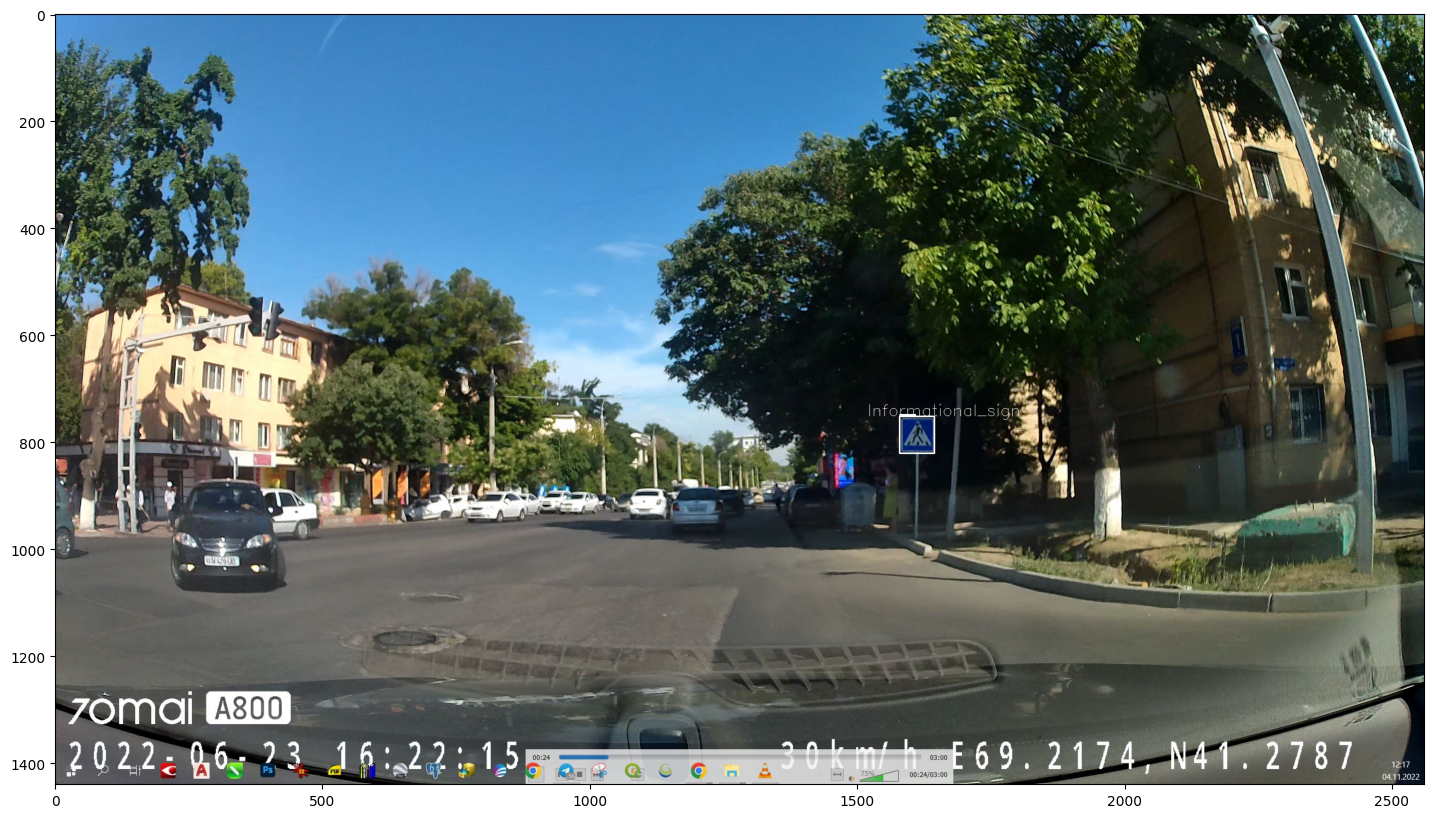

In [19]:
plt.figure(figsize=(20, 10))
plt.imshow(visualize_bbox(im, bbox, data['class'][index], (255, 255, 255) ,))

<AxesSubplot: >

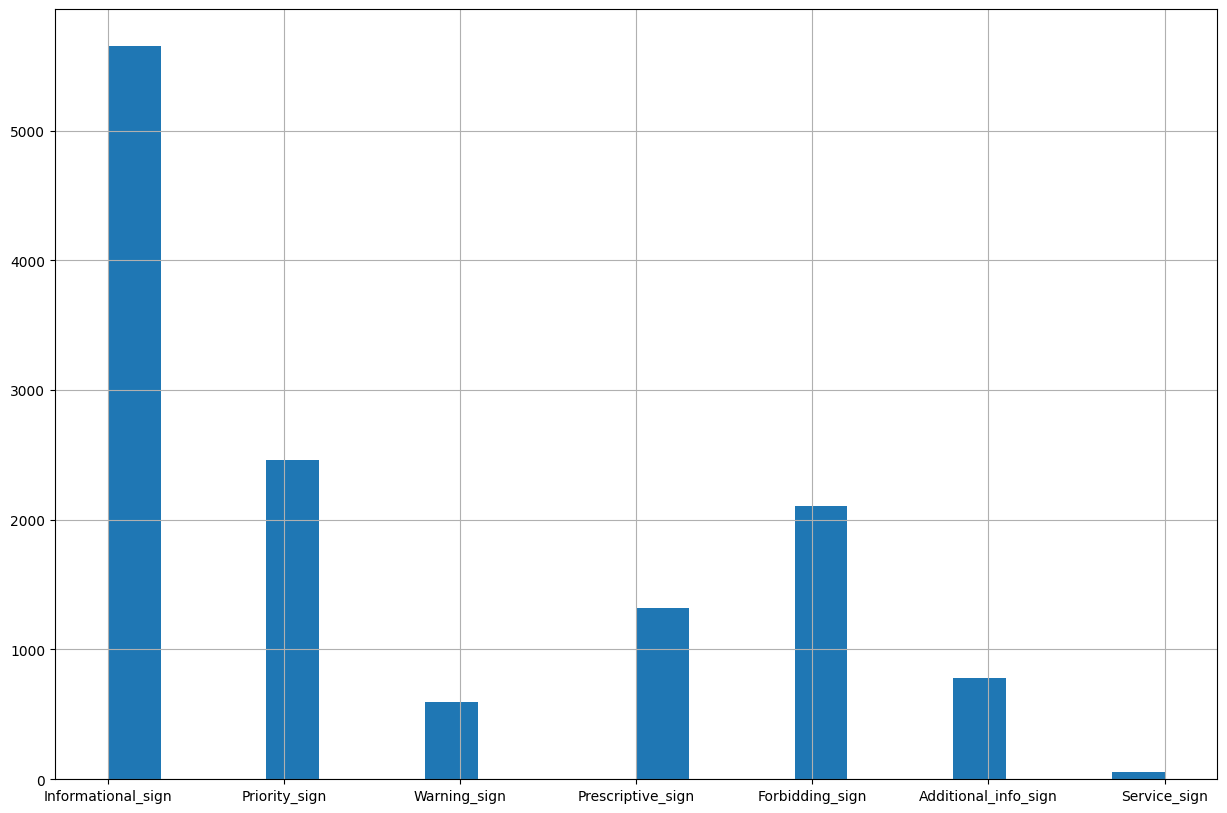

In [20]:
data['class'].hist(figsize=(15, 10), bins=20)

<AxesSubplot: >

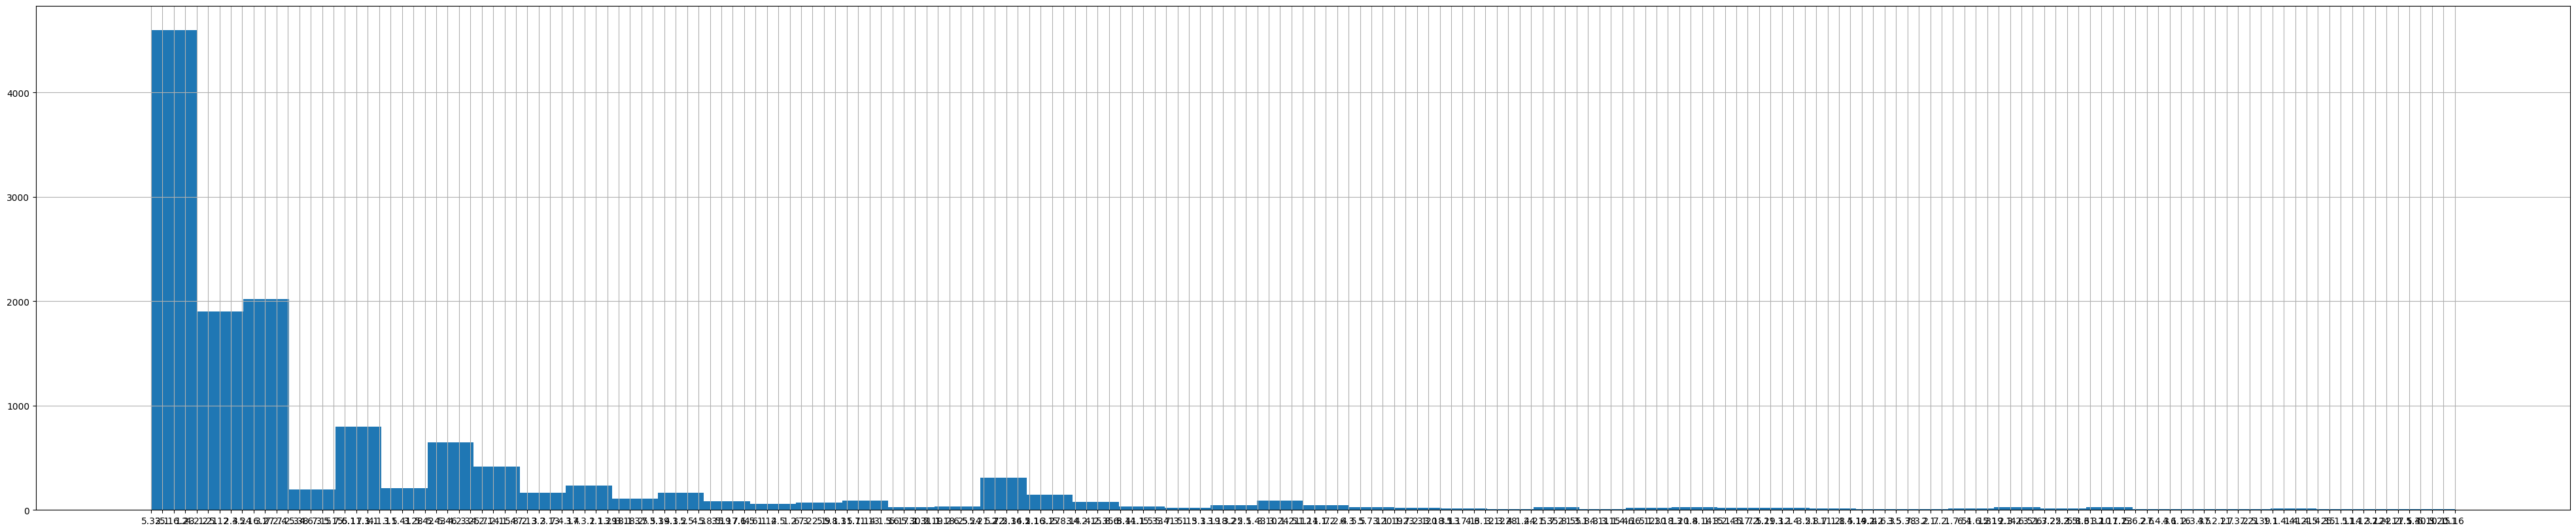

In [21]:
data['name'].hist(figsize=(50, 10), bins = 50)

In [22]:
data.to_csv('my_data.csv')